In [1]:
# Generate data for key predictor variables assuming that we have daily sales data: 
# date, website clicks, number of orders, number of men shoes sold, 
# number of women shoes sold, number of kids shoes sold,  
# competitor sales, number of complaints, etc.

N <- 365 * 5 + 1
START <- as.Date('2014-01-01')
dates <- START + (0:(N - 1))

clicks <- round(rnorm(N, 5000, 500))
n.men <- 500 + 1000 * rpois(N, 4)
n.women <- 500 + 1000 * rpois(N, 3)
n.kids <- 300 + 1000 * rpois(N, 1)
n.orders <- n.men + n.women + n.kids
comp.sales <- rnorm(N, 600000, 700)
n.emails <- 100 + 100 * rpois(N, 4)
n.complaints <- round((0.2 + rnorm(N, 0,0.01)) * n.emails)

sales <- (12000 + 50000*sin((2*pi/365)*as.numeric(dates)) + 1.3*clicks + 120*n.men + 110*n.women + 65*n.kids - 0.2*comp.sales 
          - 0.4*(n.complaints / n.emails)) + rnorm(N, 0, 100000)
data <- data.frame(
  sales=sales,date=dates, clicks=clicks, n.men=n.men, n.women=n.women, n.kids=n.kids, 
  n.orders=n.orders, comp.sales=comp.sales, n.emails=n.emails, n.complaints=n.complaints)

In [2]:
head(data)
tail(data)

sales,date,clicks,n.men,n.women,n.kids,n.orders,comp.sales,n.emails,n.complaints
774981.9,2014-01-01,4937,4500,1500,2300,8300,599608.5,500,96
1130903.4,2014-01-02,5135,4500,4500,2300,11300,601202.6,600,122
1285567.0,2014-01-03,4303,4500,4500,2300,11300,599459.9,600,136
1143957.6,2014-01-04,4554,4500,4500,2300,11300,600153.7,400,82
790726.4,2014-01-05,5287,3500,2500,2300,8300,599761.0,400,84
755779.5,2014-01-06,5766,2500,4500,300,7300,599264.8,1100,193


,sales,date,clicks,n.men,n.women,n.kids,n.orders,comp.sales,n.emails,n.complaints
1821,855450.6,2018-12-26,5185,3500,2500,2300,8300,599520.8,400,76
1822,464132.6,2018-12-27,5254,2500,3500,300,6300,600221.6,600,116
1823,251945.7,2018-12-28,5643,500,1500,1300,3300,600863.0,300,63
1824,1427763.3,2018-12-29,6115,6500,4500,1300,12300,600278.7,600,127
1825,635828.2,2018-12-30,4327,2500,2500,2300,7300,600428.4,400,90
1826,450704.1,2018-12-31,4946,2500,2500,300,5300,599757.5,400,84


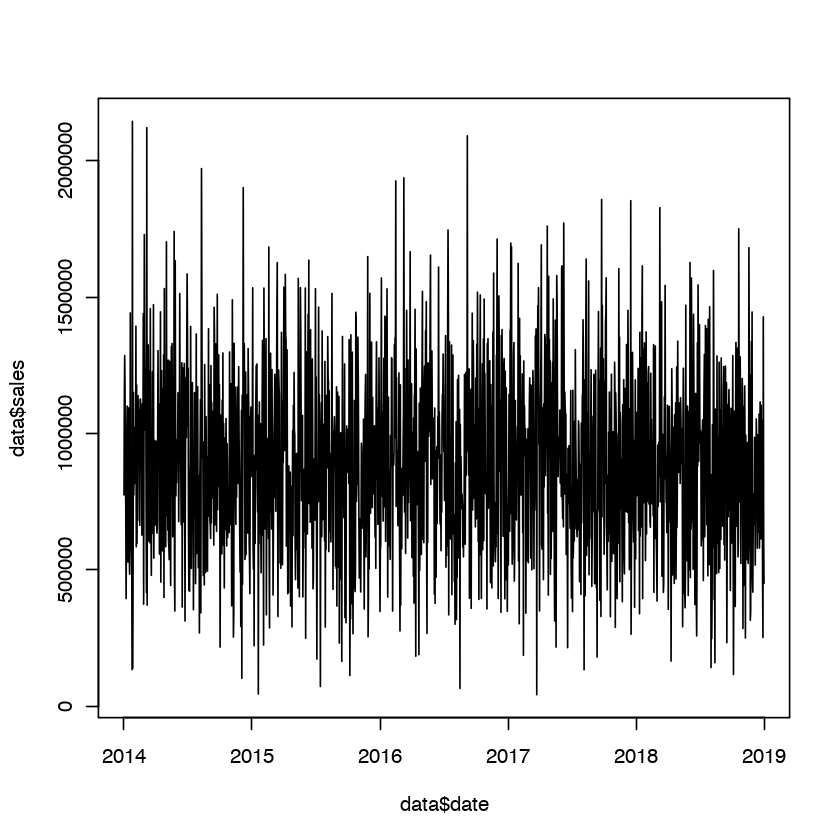

In [3]:
plot(data$date, data$sales, type='l')

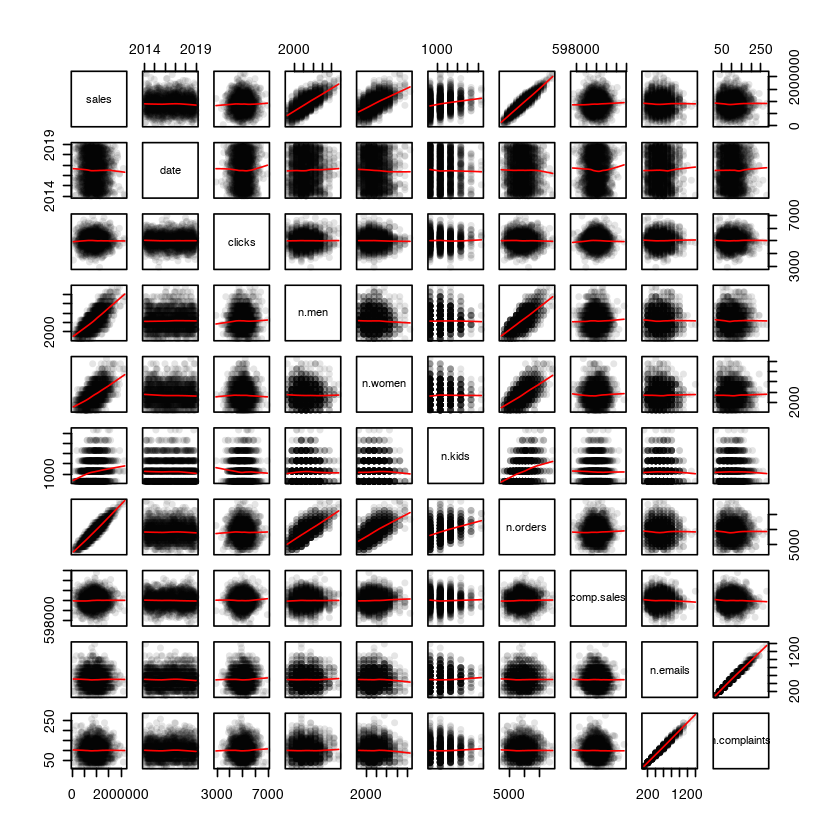

In [4]:
pairs(data, pch=16, col=rgb(0, 0, 0, 0.1), panel='panel.smooth')

In [5]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [6]:
gmod <- gam(sales ~ s(as.numeric(dates)), data, family='gaussian')

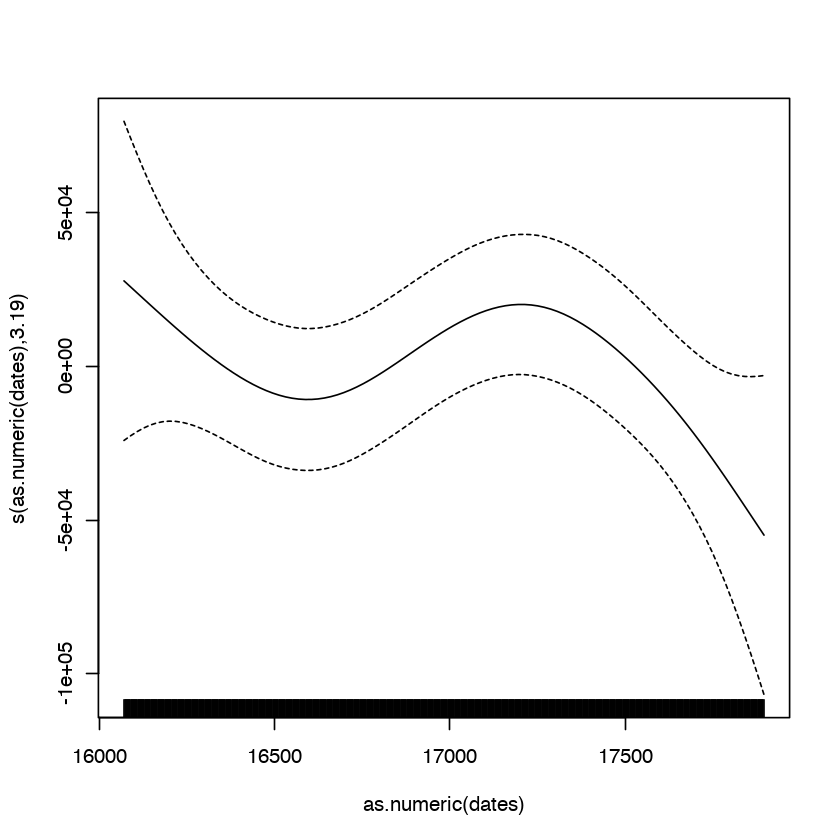

In [7]:
plot(gmod)

In [9]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [12]:
head(dates)

[1] "2014-01-01" "2014-01-02" "2014-01-03" "2014-01-04" "2014-01-05"
[6] "2014-01-06"

In [13]:
dates <- as.Date(dates,'%Y-%m-%d')

In [15]:
data$year <- as.numeric(format(dates,'%Y'))
data$month <- as.numeric(format(dates,'%m'))

[1] 1 2 3 4 5 6